In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import numpy as np
from learnMSA import msa_hmm
from matplotlib import pyplot as plt

## MSA HMM Interactive

1. Fit n models, keep the best and align
2. Compare to a reference
3. Visualize the HMM

Change the variables in the following cell to fit your needs.

In [2]:
# Your fasta file with unaligned sequences.

dataset = "ext_homfam_medium"
family = "B_lectin"
train_filename = f"../snakeMSA/data/{dataset}/train/{family}"
#train_filename = "test/data/egf.fasta"

# Reference file with aligned sequences that have matching IDs to (potentially a subset of) the 
# sequences in the train_file.
# Replace with empty string if no reference is available.
ref_filename = f"../snakeMSA/data/{dataset}/refs/{family}"
#ref_filename = "test/data/egf.ref"

# The number of independently trained models.
num_models = 10

## Training

In [ ]:
!mamba install famsa t-coffee mmseqs2 -y

Training of 10 models on file B_lectin
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=100, alpha_single=100, 

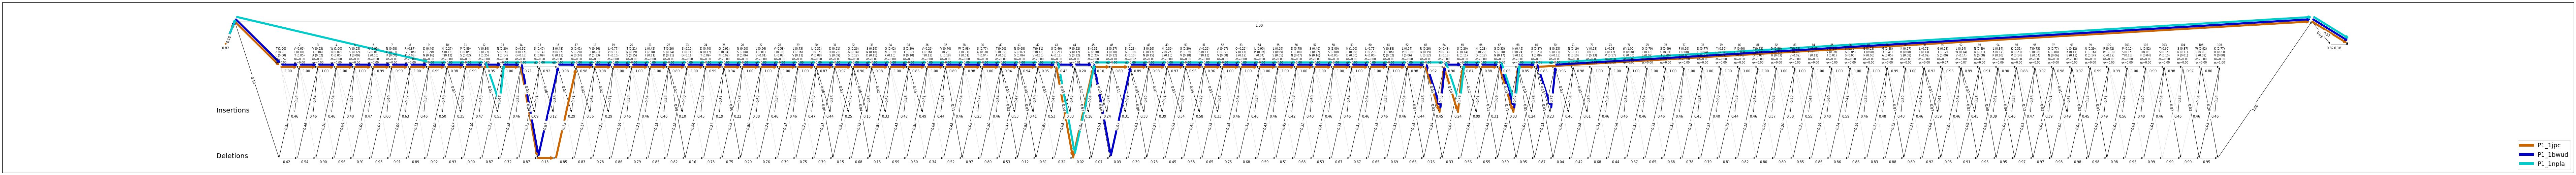

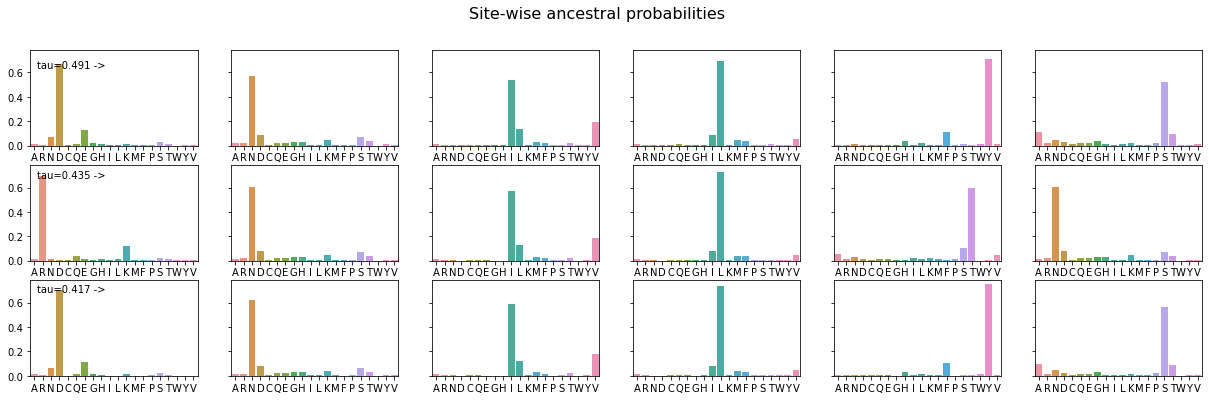

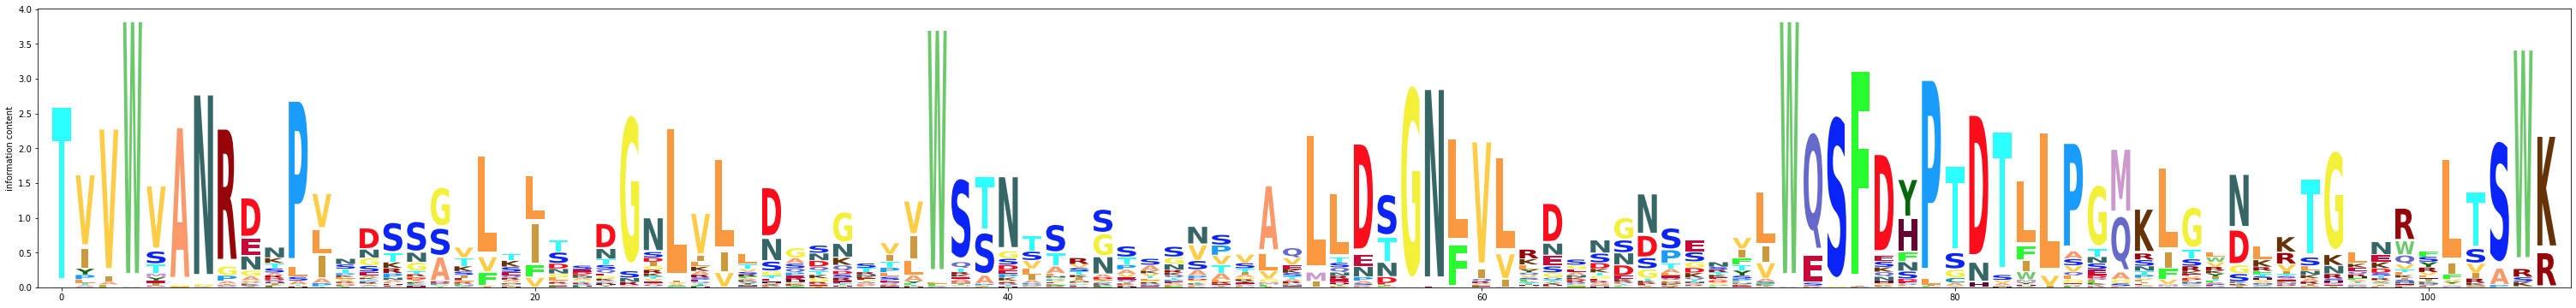

In [50]:
out_filename = "test/data/interactive.alignment.fasta"
config = msa_hmm.config.make_default(num_models)
transitioners = config["transitioner"] if hasattr(config["transitioner"], '__iter__') else [config["transitioner"]]
for trans in transitioners:
        trans.prior.alpha_flank = 100
        trans.prior.alpha_single = 100
        trans.prior.alpha_global = 30
        trans.prior.alpha_flank_compl = 1
        trans.prior.alpha_single_compl = 0.1
        trans.prior.alpha_global_compl = 0.001
alignment_model = msa_hmm.align.run_learnMSA(train_filename,
                                              out_filename,
                                              config, 
                                              verbose=True,
                                              align_insertions=True)
msa_hmm.vis.print_and_plot(alignment_model, alignment_model.best_model)

In [53]:
!id_list=$(sed -n '/^>/p' {ref_filename} | sed 's/^.//') ; export MAX_N_PID_4_TCOFFEE=10000000 ; t_coffee -other_pg seq_reformat -in test/data/interactive.alignment.fasta -action +extract_seq_list ${{id_list[@]}} +rm_gap > test/data/interactive.projection.fasta

HERE: P1_1jpc
HERE: P1_1bwud
HERE: P1_1npla


In [54]:
!t_coffee -other_pg aln_compare -al1 {ref_filename} -al2 test/data/interactive.projection.fasta -compare_mode sp

*****************************************************
seq1       seq2          Sim   [ALL]           Tot  
B_lectin      3          59.9    81.2 [100.0]   [  648]


In [14]:
!head ../snakeMSA/famsa/scores/{dataset}/{family}

ext_homfam_medium B_lectin 97.5 97.5 96.3 96.3


In [15]:
!head ../snakeMSA/learnMSA/scores/{dataset}/{family}

ext_homfam_medium B_lectin 27.8 41.1 0.0 0.0


In [26]:
!head ../snakeMSA/data/{dataset}/refs/{family}

>P1_1jpc
DNILYSGETLSTGEFLNYGSFVFIMQEDCNLVLYDVDKPIWATNTGG-LSRSCFLSMQTDGNLVVYNPSN
KPIWASNTGGQNGNYVCILQKDRNVVIYGTDRWATGTHT-
>P1_1bwud
RNILTNDEGLYGGQSLDVNPYHLIMQEDCNLVLYDHSTAVWSSNTDIPGKKGCKAVLQSDGNFVVYDAEG
ASLWASHSVRGNGNYVLVLQEDGNVVIYRSDIWSTNTYR-
>P1_1npla
DNILYSGETLSPGEFLNNGRYVFIMQEDCNLVLYDVDKPIWATNTGG-LDRRCHLSMQSDGNLVVYSPRN
NPIWASNTGGENGNYVCVLQKDRNVVIYGTARWATGTNIH


In [18]:
!head -n 20 test/data/interactive.projection.fasta

>P1_1jpc
dnilysgetlstgeflnygsfvfimqedcnlvlydvdk-piwatntggls
.......--rscflsmqtdgnlvvynpsnkpiwasntggqngnyvcilqk
drnvviygtdrwatgtht.
>P1_1bwud
rniltndeglyggqsldvnpyhlimqedcnlvlydhs.tavwssntdipg
.......-kkgckavlqsdgnfvvydaegaslwashsvrgngnyvlvlqe
dgnvviyrsdiwstntyr.
>P1_1npla
dnilysgetlspgeflnngryvfimqedcnlvlydv..--------dkpi
watntggldrrchlsmqsdgnlvvysprnnpiwasntggengnyvcvlqk
drnvviygtarwatgtnih


In [30]:
!head -n 20 ../snakeMSA/data/{dataset}/train/{family}

>P1_1jpc
DNILYSGETLSTGEFLNYGSFVFIMQEDCNLVLYDVDKPIWATNTGGLSRSCFLSMQTDGNLVVYNPSNK
PIWASNTGGQNGNYVCILQKDRNVVIYGTDRWATGTHT
>P1_1bwud
RNILTNDEGLYGGQSLDVNPYHLIMQEDCNLVLYDHSTAVWSSNTDIPGKKGCKAVLQSDGNFVVYDAEG
ASLWASHSVRGNGNYVLVLQEDGNVVIYRSDIWSTNTYR
>P1_1npla
DNILYSGETLSPGEFLNNGRYVFIMQEDCNLVLYDVDKPIWATNTGGLDRRCHLSMQSDGNLVVYSPRNN
PIWASNTGGENGNYVCVLQKDRNVVIYGTARWATGTNIH
>KVI10412.1/337-445
TVAWVANRETPIANKSGELTLNPDGVLVLRDSItNRIMWSSNATSTIQNPVARLLDTGNLMVvdgdDDSN
DPENYIWQSFDHPTDTFLPDLKFGRNLKKGVVTNFTSWK
>KVI10412.1/1035-1141
TVAWVANREIPIRNNSGELTLHSDGVLVLRDSTtNTIVWSTSSPGTTTGNPVARLSDSGNLVVvNDDNEP
ENYIWQSFDHPGDTVLPGMKFGRDLEKGIVTNVTSWK
>KVI10412.1/1779-1884
TVAWVANREIPIRNNSGELTLHSDGVLVLRDSTtNQVVWSSTSSETAENPVARLLDSGNLMVvDRDDGPE
NYIWQSFDYPGDTALAGVKVGRNLERGVVTNLTSWK
>KVI10412.1/2416-2523
TVVWVANRETPIRNKTGELTLHPDGVLELRDTAtDIIVWSTNTKGSAQNLVARLLDSGNLVVidnDDDNQ


In [ ]:
!grep "NIL" ../snakeMSA/data/{dataset}/train/{family}

In [46]:
!mmseqs easy-cluster ../snakeMSA/data/{dataset}/train/{family} test_cluster tmp --cov-mode 1 --min-seq-id 0.5

easy-cluster ../snakeMSA/data/ext_homfam_medium/train/B_lectin test_cluster tmp --cov-mode 1 --min-seq-id 0.5 

MMseqs Version:                     	14.7e284
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask residues probabilit